A quick intro to Numpy and Pandas

# Numpy 
It is a numerical matrix/vector library that adds all the funcionalities to manipulate matrices and vectors. From a Matlab user, Numpy gives all the same functionalties with a similar syntax.

In [1]:
import numpy as np

The Array is the basic numpy element

In [2]:
v = np.array([1,2,3,4,5,6])
v

array([1, 2, 3, 4, 5, 6])

Acceswing elements and slicing is done with square parenthesis, round () parenthesis are reserved for function calls.

In [3]:
v[0]  #indexing starts from 0 !

1

In [4]:
v[0:-1]

array([1, 2, 3, 4, 5])

In [5]:
M = v.reshape((2,3))
M

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
b = np.ones((3,1)); b

array([[1.],
       [1.],
       [1.]])

Inner prodcut is called np.dot

In [7]:
np.dot(M, b)  #This is fast as matlab, implemented with BLAS libraries in C.

array([[ 6.],
       [15.]])

Python is object oriented, so everything is an object, even an array.

In [14]:
M2 = np.arange(100).reshape((10,10))

In [15]:
M2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [16]:
M2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [17]:
M2.diagonal()

array([ 0, 11, 22, 33, 44, 55, 66, 77, 88, 99])

Slicing 1st four rows

In [18]:
M2[0:4,:]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

Basic Plotting 

In [19]:
import matplotlib.pyplot as plt

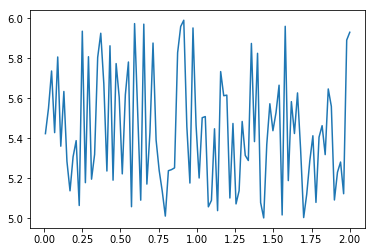

In [33]:
x = np.linspace(0.01, 2, 100)
y = np.random.random(100)+5
plt.plot(x,y)

A quick 1/x function

In [36]:
def f(x): return 1/x

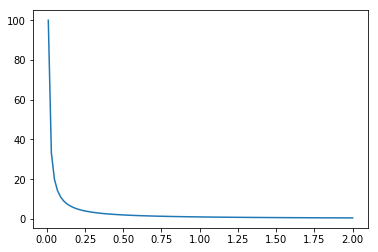

In [37]:
plt.plot(x, f(x))

## A linear regression 
Some linear Algebra...

In [147]:
n = 100

In [148]:
x = np.ones((n,2))
x[:,0] = np.random.uniform(-1, 1, 100)
x[:5]

array([[-0.67478587,  1.        ],
       [-0.5418712 ,  1.        ],
       [ 0.0141637 ,  1.        ],
       [-0.82934658,  1.        ],
       [ 0.55767404,  1.        ]])

In [149]:
a = np.array([3,2])

In [150]:
y = x@a + np.random.uniform(-1,1, n)

In [151]:
y[0:5]

array([ 0.90177002,  0.75226449,  1.13807173, -1.23881367,  4.63427032])

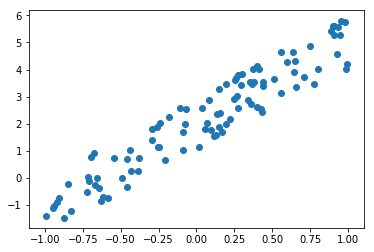

In [152]:
plt.scatter(x[:,0], y)

In [153]:
def l(x): return 3*x + 2

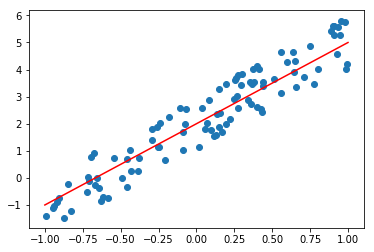

In [154]:
#The underlying linear function
x0 = np.linspace(-1,1,n)
plt.scatter(x[:,0], y)
plt.plot(x0, l(x0), color='r')

We will import the linear regressor from the sklearn library

In [155]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [156]:
#Create a linear regressor
regr = linear_model.LinearRegression()

In [157]:
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [158]:
regr.coef_, regr.intercept_

(array([3.26243712, 0.        ]), 2.0269864397879926)

In [159]:
y_pred = regr.predict(x)

In [160]:
mse = mean_squared_error(y, y_pred)
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 0.36


In [161]:
# Explained variance score: 1 is perfect prediction
r2 = r2_score(y, y_pred)
print(f'Variance score: {r2:.2f}')

Variance score: 0.90


# Pandas

pandas is a great library to work with tabular (Excel kind of) data.

In [162]:
import pandas as pd

The primary data structures in pandas are implemented as two classes:

- DataFrame, which you can imagine as a relational data table, with rows and named columns.
Series, which is a single column. A DataFrame contains one or more Series and a name for each Series.
- The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in Spark and R.

One way to create a Series is to construct a Series object. For example:

In [163]:
pd.Series(['Paris', 'Chambery', 'Marseille'])

0        Paris
1     Chambery
2    Marseille
dtype: object

DataFrame objects can be created by passing a dict mapping string column names to their respective Series. If the Series don't match in length, missing values are filled with special NA/NaN values. Example:

In [164]:
city_names = pd.Series(['Paris', 'Chambery', 'Marseille'])
population = pd.Series([2201356, 73256, 105962])

In [186]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })

In [172]:
cities

,City name,Population
0,Paris,2201356
1,Chambery,73256
2,Marseille,105962


You can Load and entire file into a DataFrame

In [167]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

To useful methods to quickly get some info on a DataFrame are head and describe

In [168]:
california_housing_dataframe.head(5) #first 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [169]:
california_housing_dataframe.describe() #stats per column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plotting is built into the pandas DataFrame class (behind the scene matplolib is called)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017862BC4DD8>]], dtype=object)

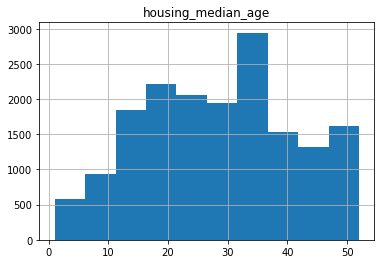

In [170]:
california_housing_dataframe.hist('housing_median_age')

## Accesing Data

In [173]:
cities['City name'] #gets column 'City name'

0        Paris
1     Chambery
2    Marseille
Name: City name, dtype: object

In addition, pandas provides an extremely rich API for advanced indexing and selection that is too extensive to be covered here.

In [174]:
cities['City name'][1]

'Chambery'

## Manipulating Data

We can also manipulate data

In [179]:
population/1000

0    2201.356
1      73.256
2     105.962
dtype: float64

Adding a column to our cities DataFrame is easy

In [187]:
cities['Area km2'] = pd.Series([253, 23, 97.92])

In [188]:
cities

,City name,Population,Area km2
0,Paris,2201356,253.00
1,Chambery,73256,23.00
2,Marseille,105962,97.92


## Importing Data

In [228]:
data_df = pd.read_csv('data.csv', index_col='date', parse_dates=True)

In [229]:
data_df.head()

,cell_temp,amb_temp,irradiance,dcPower
date,,,,
2017-10-01 00:00:00,12600.0,0.0,8700.0,-1.0
2017-10-01 00:10:00,12350.0,0.0,8167.0,-2.0
2017-10-01 00:20:00,12367.0,0.0,8500.0,-1.0
2017-10-01 00:30:00,12500.0,0.0,8650.0,-1.0
2017-10-01 00:40:00,11900.0,0.0,8167.0,-1.0


In [230]:
data_df.index

DatetimeIndex(['2017-10-01 00:00:00', '2017-10-01 00:10:00',
               '2017-10-01 00:20:00', '2017-10-01 00:30:00',
               '2017-10-01 00:40:00', '2017-10-01 00:50:00',
               '2017-10-01 01:00:00', '2017-10-01 01:10:00',
               '2017-10-01 01:20:00', '2017-10-01 01:30:00',
               ...
               '2017-12-30 22:20:00', '2017-12-30 22:30:00',
               '2017-12-30 22:40:00', '2017-12-30 22:50:00',
               '2017-12-30 23:00:00', '2017-12-30 23:10:00',
               '2017-12-30 23:20:00', '2017-12-30 23:30:00',
               '2017-12-30 23:40:00', '2017-12-30 23:50:00'],
              dtype='datetime64[ns]', name='date', length=13104, freq=None)

In [249]:
data_df.loc['10-2017']

,cell_temp,amb_temp,irradiance,dcPower
date,,,,
2017-10-01 00:00:00,12600.000000,0.0,8700.000000,-1.000000
2017-10-01 00:10:00,12350.000000,0.0,8167.000000,-2.000000
2017-10-01 00:20:00,12367.000000,0.0,8500.000000,-1.000000
2017-10-01 00:30:00,12500.000000,0.0,8650.000000,-1.000000
2017-10-01 00:40:00,11900.000000,0.0,8167.000000,-1.000000
2017-10-01 00:50:00,12000.000000,0.0,7800.000000,-1.000000
2017-10-01 01:00:00,12200.000000,0.0,8050.000000,0.000000
2017-10-01 01:10:00,12200.000000,0.0,8567.000000,0.000000
2017-10-01 01:20:00,12200.000000,0.0,8950.000000,0.000000


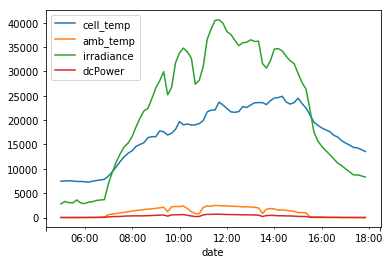

In [250]:
data_df['05h 13-Oct-2017': '17h 13-Oct-2017'].plot()

Easily resample

In [251]:
data1h = data_df.resample('1h', label='right', closed='right').sum()

In [252]:
data1h.head()

,cell_temp,amb_temp,irradiance,dcPower
date,,,,
2017-10-01 00:00:00,12600.0,0.0,8700.0,-1.0
2017-10-01 01:00:00,73317.0,0.0,49334.0,-6.0
2017-10-01 02:00:00,74050.0,0.0,55667.0,0.0
2017-10-01 03:00:00,74300.0,0.0,57750.0,0.0
2017-10-01 04:00:00,74502.0,0.0,57634.0,0.0


## Let's make a model
We will use a Random Forest regressor, it is a simple but powerful model

In [254]:
from sklearn.ensemble import RandomForestRegressor

Let's define training and validation sets, let's predict on sundays...

In [261]:
idx_train = data_df.index.dayofweek!=6
idx_val = data_df.index.dayofweek==6

In [262]:
idx_train

array([False, False, False, ...,  True,  True,  True])

We have to prepare the data

In [265]:
train = data_df[idx_train].drop('dcPower', axis=1)
y_train = data_df['dcPower'][idx_train]

val = data_df[idx_val].drop('dcPower', axis=1)
y_val = data_df['dcPower'][idx_val]

Create and fit the model

In [267]:
m = RandomForestRegressor()
m.fit(train, y_train)
m.score(train, y_train), m.score(val, y_val)

C:\Users\TC256760\AppData\Local\Continuum\anaconda3\envs\modelling\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9973831460174164, 0.9796004832247667)

It's not bad at all! Let's compute the predictions on validation set

In [268]:
preds = m.predict(val)

In [270]:
res = pd.concat([pd.Series(data = preds, index=y_val.index), y_val], axis=1)
res.columns = ['model', 'dcPower']

In [279]:
res.head()

,model,dcPower
date,,
2017-10-01 00:00:00,-0.7,-1.0
2017-10-01 00:10:00,-1.6,-2.0
2017-10-01 00:20:00,-1.6,-1.0
2017-10-01 00:30:00,-0.6,-1.0
2017-10-01 00:40:00,-0.1,-1.0


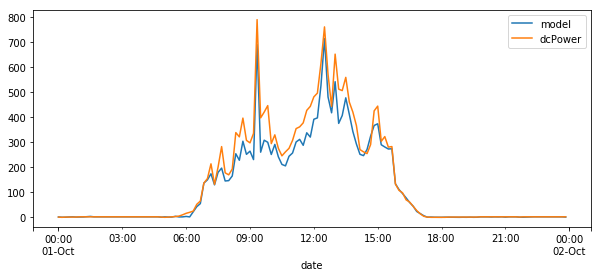

In [278]:
res['10-01-2017'].plot(figsize=(10,4))